In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from nltk.tokenize import RegexpTokenizer,sent_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split

In [2]:
# import data of math subreddit
math_submissions = pd.read_csv('math_submissions.csv')
test_math_submissions = math_submissions.copy()

# math_submissions: convert utc time to local time and see the distribution of post based on hour
test_math_submissions['local_time_new'] = test_math_submissions['created_utc'].map(lambda x:datetime.fromtimestamp(x))
test_math_submissions['local_time_new_hour'] = test_math_submissions['created_utc'].map(lambda x:datetime.fromtimestamp(x).hour)


# sns.countplot(test_math_submissions['local_time_new_hour']);

In [3]:
# import data of Physics subreddit

physics_submissions = pd.read_csv('physics_submissions.csv')
test_physics_submissions = physics_submissions.copy()

# physics_submissions: convert utc time to local time and see the distribution of post based on hour
test_physics_submissions['local_time_new'] = test_physics_submissions['created_utc'].map(lambda x:datetime.fromtimestamp(x))
test_physics_submissions['local_time_new_hour'] = test_physics_submissions['created_utc'].map(lambda x:datetime.fromtimestamp(x).hour)
# sns.countplot(test_physics_submissions['local_time_new_hour']);

In [9]:
# take a look of the removed post

math_submissions_removed = pd.read_csv('math_submissions_removed.csv')
test_math_submissions_removed = math_submissions_removed.copy()
test_math_submissions_removed['local_time_new'] = test_math_submissions_removed['created_utc'].map(lambda x:datetime.fromtimestamp(x))
test_math_submissions_removed['local_time_new_hour'] = test_math_submissions_removed['created_utc'].map(lambda x:datetime.fromtimestamp(x).hour)


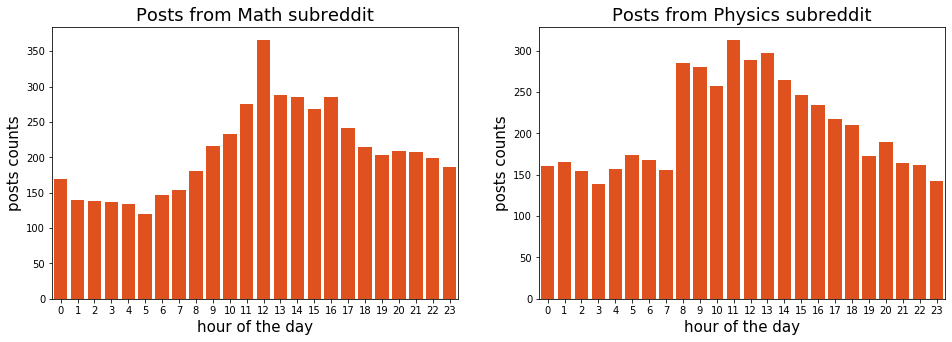

In [32]:
# plot the distribution of number of posts for each hour of the day 
# color=(1,0.2627451,0) reddit logo color

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot(x = test_math_submissions['local_time_new_hour'], color=(1,0.2627451,0));
plt.xlabel('hour of the day',fontsize=15);
plt.ylabel('posts counts',fontsize=15);
plt.title('Posts from Math subreddit',fontsize=18);

plt.subplot(1,2,2)
sns.countplot(x = test_physics_submissions['local_time_new_hour'], color=(1,0.2627451,0));
plt.xlabel('hour of the day',fontsize=15);
plt.ylabel('posts counts',fontsize=15);
plt.title('Posts from Physics subreddit',fontsize=18);

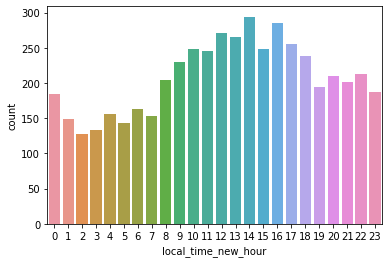

In [33]:
# take a look of the distribution of removed posts from math
sns.countplot(x = test_math_submissions_removed['local_time_new_hour']);

### Prepare the submission data

In [34]:
def prepare(data_df):
    # combine title column and selftext column
    # check if the selftext is null and create a new column based on the result
    data_df['selftext_null'] = data_df['selftext'].isnull().astype(int)
    # using apply function to combine, if selftext is null then return title, otherwise, combine them.
    data_df['title_selftext'] = data_df.apply(lambda x: x['title'] if (x['selftext_null']==1) else (x['title']+x['selftext']),axis=1)
    
    # tokenize the title_selftext
    regex_token = RegexpTokenizer('\w+')
    data_df['title_selftext_token'] = data_df['title_selftext'].map(lambda x: regex_token.tokenize(x.lower()))
    
    # lemmitize the title_selftext_token
    lemmatizer = WordNetLemmatizer()
    data_df['title_selftext_token'] = data_df['title_selftext_token'].map(lambda x:[lemmatizer.lemmatize(i) for i in x])
    
    # convert list back to string in order to CountVectorizer
    data_df['title_selftext_new'] = data_df['title_selftext_token'].map(lambda x: ','.join(x))
    
    return data_df

In [37]:
math_submissions = prepare(math_submissions)

In [38]:
physics_submissions = prepare(physics_submissions)

### Combine Math and Physics

In [39]:
# combine 2 datasets

data_1 =  pd.concat([math_submissions[['title_selftext_new','subreddit']],physics_submissions[['title_selftext_new','subreddit']]],axis=0,ignore_index=True)

In [44]:
X_1 = data_1['title_selftext_new']
y_1 = data_1['subreddit']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=42, stratify=y_1)

In [46]:
%store X_train_1
%store X_test_1
%store y_train_1
%store y_test_1

Stored 'X_train_1' (Series)
Stored 'X_test_1' (Series)
Stored 'y_train_1' (Series)
Stored 'y_test_1' (Series)


### Prepare the removed posts data

In [13]:
# since the selftext in removed posts is ['removed'], change it to nan
math_submissions_removed['selftext'] = np.nan

In [14]:
math_submissions_removed = prepare(math_submissions_removed)

In [15]:
# change the values in subreddit column to removed
math_submissions_removed['subreddit'] = 'removed'

In [16]:
data_2 =  pd.concat([math_submissions[['title_selftext_new','subreddit']],math_submissions_removed[['title_selftext_new','subreddit']]],axis=0,ignore_index=True)

In [17]:
X_2 = data_2['title_selftext_new']
y_2 = data_2['subreddit']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=42, stratify=y_2)

In [ ]:
%store X_train_2
%store X_test_2
%store y_train_2
%store y_test_2